In [1]:
from helpers import *

In [2]:
df = pd.read_csv('../../DATAHUB/cca_06262025.csv')
df['DATE'] = pd.to_datetime(df['DATE'])

df

,DATE,COUNT,TOTAL_SALES,TICKER_CODE
0,2013-01-01,20,73761,2138
1,2013-01-01,12,85905,2157
2,2013-01-01,2,4070,2193
3,2013-01-01,35,120393,2211
4,2013-01-01,2,6000,2267
...,...,...,...,...
1107795,2026-03-31,3364,11895353,4478
1107796,2026-04-30,1724,5072281,3994
1107797,2026-04-30,1695,5980035,4478
1107798,2026-05-31,39,149150,3994


In [3]:
# データ読み込みとフィルタリング
df_filtered = filter_data_cca(df)

df_filtered

original data: 1107800
filtered data: 1012775


,DATE,COUNT,TOTAL_SALES,TICKER_CODE
0,2013-01-01,20,73761,2138
1,2013-01-01,12,85905,2157
2,2013-01-01,2,4070,2193
3,2013-01-01,35,120393,2211
4,2013-01-01,2,6000,2267
...,...,...,...,...
1107771,2025-06-08,15,79110,9842
1107772,2025-06-08,738,4968883,9843
1107773,2025-06-08,4,31999,9974
1107776,2025-06-30,17057,51054219,3994


In [4]:
df_monthly = daily_to_monthly(df_filtered, 'TOTAL_SALES')
df_monthly

original data: 1012775
monthly data: 34937


,MONTH,TICKER_CODE,TOTAL_SALES
0,2013-01,2138,985151
1,2013-01,2157,1377478
2,2013-01,2193,2924974
3,2013-01,2211,2521892
4,2013-01,2267,238000
...,...,...,...
34932,2025-05,9974,327291989
34933,2025-05,9983,1720150602
34934,2025-05,9984,4053911322
34935,2025-05,9989,403450209


In [5]:
df_yoy = calculate_yoy(df_monthly, 'TOTAL_SALES')
df_yoy

original data: 34937
yoy data: 32077


,MONTH,TICKER_CODE,TOTAL_SALES,YOY
2677,2014-01,2138,3470893,3.523209
2678,2014-01,2157,2673437,1.940820
2679,2014-01,2193,4141117,1.415779
2680,2014-01,2211,2872552,1.139046
2681,2014-01,2267,240100,1.008824
...,...,...,...,...
34932,2025-05,9974,327291989,1.143396
34933,2025-05,9983,1720150602,1.116378
34934,2025-05,9984,4053911322,0.663956
34935,2025-05,9989,403450209,1.143850


In [6]:
df_yoy_compare_past_month = compare_to_past_month(df_yoy, 'YOY')
df_yoy_compare_past_month

,MONTH,TICKER_CODE,TOTAL_SALES,YOY,COMPARE_PAST_MONTH
3134,2014-03,2138,3172925,1.713064,-0.755096
3135,2014-03,2157,2471095,1.696772,-0.052559
3136,2014-03,2193,4505422,1.408529,-0.008794
3137,2014-03,2211,3660886,1.126150,0.024131
3138,2014-03,2267,6907275,2.520526,0.755615
...,...,...,...,...,...
34932,2025-05,9974,327291989,1.143396,-0.001821
34933,2025-05,9983,1720150602,1.116378,0.053325
34934,2025-05,9984,4053911322,0.663956,-0.194898
34935,2025-05,9989,403450209,1.143850,-0.033161


In [7]:
# price dataの読み込み
# price_data = pd.read_csv('../../DATAHUB/price_data_with_dividends_from_yfinance_06262025.csv')
price_data = pd.read_csv('../../DATAHUB/new_price_data.csv')
price_data

,DATE,TICKER_CODE,PRICE,DIVIDENDS,MONTHLY_RETURN
0,2013-01,2138,923.174316,0.0,NaN
1,2013-02,2138,1558.038574,0.0,0.687697
2,2013-03,2138,1587.160767,15.0,0.028319
3,2013-04,2138,1977.104126,0.0,0.245686
4,2013-05,2138,3473.158691,0.0,0.756690
...,...,...,...,...,...
30499,2025-02,5032,2811.156250,0.0,-0.110972
30500,2025-03,5032,3201.704834,0.0,0.138928
30501,2025-04,5032,3667.587646,32.5,0.155662
30502,2025-05,5032,3950.000000,0.0,0.077002


In [8]:
# percentiles = [10, 25, 40, 100]

multiple_portfolios = create_multiple_portfolios(df_yoy, price_data, percentiles=[20, 25, 30, 100])
multiple_portfolios

上位20%のポートフォリオを作成中...
上位25%のポートフォリオを作成中...
上位30%のポートフォリオを作成中...
上位100%のポートフォリオを作成中...


,top_20p,top_25p,top_30p,top_100p
MONTH,,,,
2014-03,0.045536,0.032045,0.041426,0.028539
2014-04,-0.003686,-0.017419,-0.014136,-0.007065
2014-05,0.017804,0.018049,0.021270,0.029964
2014-06,0.040966,0.050519,0.057018,0.047605
2014-07,0.051119,0.053092,0.044270,0.025463
...,...,...,...,...
2025-01,0.000508,0.012228,0.013153,0.015408
2025-02,-0.017286,-0.018519,-0.018684,-0.020038
2025-03,0.024991,0.028331,0.026592,0.020226


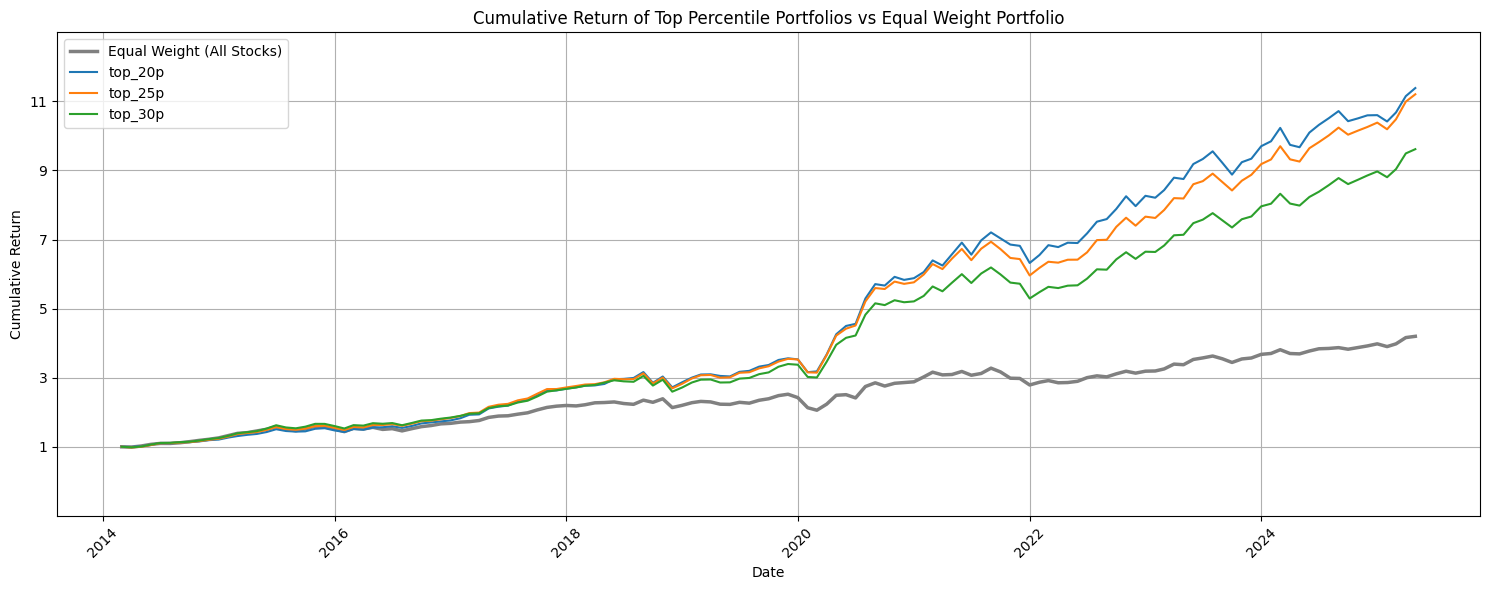

In [9]:
# set date index
multiple_portfolios.index = pd.to_datetime(multiple_portfolios.index)

# 可視化
plot_portfolio_returns(multiple_portfolios)

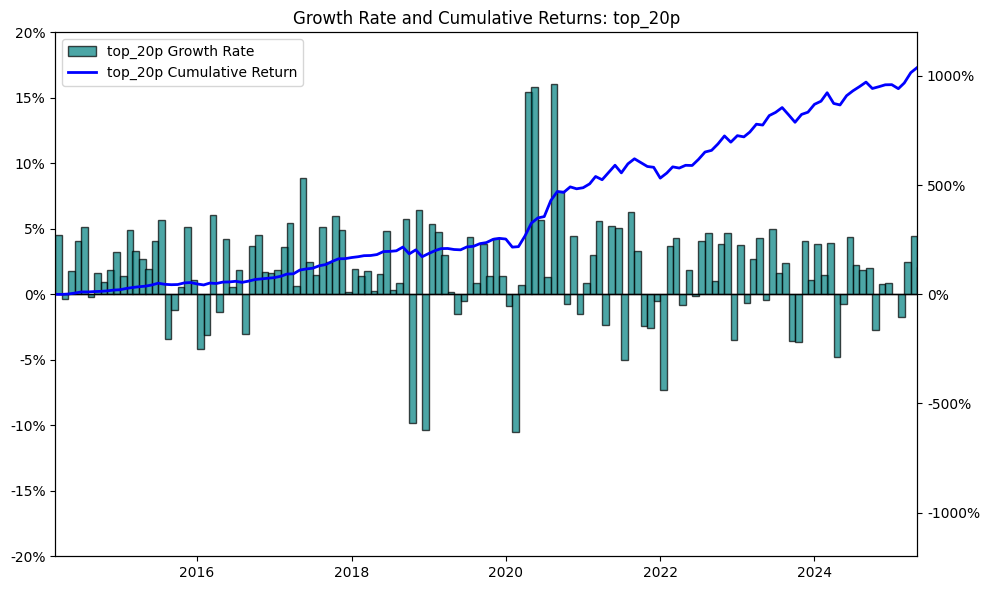

In [10]:
plot_growth_rate(multiple_portfolios, 'top_20p')

In [11]:
# パフォーマンス指標計算
print("パフォーマンス指標を計算中...")
performance_metrics = calculate_performance_metrics(multiple_portfolios)

print("\n=== パフォーマンス指標 ===")
print(performance_metrics.round(2))


パフォーマンス指標を計算中...

=== パフォーマンス指標 ===
          Total Return (%)  Annual Return (%)  Monthly Return (%)  \
top_20p            1090.57              24.63                1.93   
top_25p            1056.59              24.31                1.90   
top_30p             901.60              22.73                1.79   
top_100p            331.89              13.89                1.15   

          Annual Volatility (%)  Monthly Volatility (%)  Sharpe Ratio  \
top_20p                   13.73                    3.96          1.79   
top_25p                   13.50                    3.90          1.80   
top_30p                   13.29                    3.84          1.71   
top_100p                  11.97                    3.46          1.16   

          Max Drawdown (%)  Win Rate (%)  
top_20p             -14.01         75.56  
top_25p             -14.08         75.56  
top_30p             -14.95         74.07  
top_100p            -18.35         70.37  


In [12]:
# 月次統計計算
print("\n=== 月次リターンの詳細統計 ===")
monthly_stats = calculate_monthly_statistics(multiple_portfolios)
print(monthly_stats.round(2))



=== 月次リターンの詳細統計 ===
          月次平均リターン (%)  月次ボラティリティ (%)  最小月次リターン (%)  最大月次リターン (%)  中央値 (%)
top_20p           1.93           3.96        -10.48         16.08     1.85
top_25p           1.90           3.90        -10.54         16.21     2.08
top_30p           1.79           3.84        -11.80         15.22     2.25
top_100p          1.15           3.46        -12.06         13.68     1.63


In [13]:
# 最終累積リターン計算
print("\n=== 最終累積リターン ===")
final_returns = calculate_final_returns(multiple_portfolios)
print(final_returns.to_string(index=False))



=== 最終累積リターン ===
Portfolio  Final Return
  top_20p         11.91
  top_25p         11.57
  top_30p         10.02
 top_100p          4.32


In [14]:
# 分析結果サマリー
generate_analysis_summary(multiple_portfolios, df_yoy, performance_metrics)


=== 分析結果サマリー ===
分析期間: 2014-03-01 00:00:00 から 2025-05-01 00:00:00
対象銘柄数: 238
分析したポートフォリオ: ['top_20p', 'top_25p', 'top_30p', 'top_100p']

最高パフォーマンス: top_20p (1090.57%)
最低パフォーマンス: top_100p (331.89%)

最高シャープレシオ: top_25p (1.80)
最低最大ドローダウン: top_100p (-18.35%)

=== パーセンタイルポートフォリオ間の比較 ===
最高パーセンタイル: top_20p (1090.57%)
最低パーセンタイル: top_100p (331.89%)
